In [31]:
import numpy as np
import cv2
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, push_notebook
import time
from matplotlib import pyplot as plt
output_notebook()
%matplotlib notebook

Loading BokehJS ...

Leer y mostrar video

In [30]:
vidcap = cv2.VideoCapture('shopping_center.mpg')
success,frame = vidcap.read()

frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA) # because Bokeh expects a RGBA image
frame=cv2.flip(frame, -1) # because Bokeh flips vertically
width=frame.shape[1]
height=frame.shape[0]
p = figure(x_range=(0,width), y_range=(0,height), output_backend="webgl", width=width, height=height)
myImage = p.image_rgba(image=[frame], x=0, y=0, dw=width, dh=height)
show(p, notebook_handle=True)

while success:
    success,frame = vidcap.read()
    if not success:
        vidcap.release()
        break
    frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
    frame=cv2.flip(frame, -1)
    myImage.data_source.data['image']=[frame]
    push_notebook()
    time.sleep(1/25)    
vidcap.release()    
    #print('Read a new frame: ', success)


In [29]:
vidcap = cv2.VideoCapture('shopping_center.mpg')
print(vidcap.get(cv2.CAP_PROP_FPS))
vidcap.release()

25.0


Cambier frame rate: time

Guardar frames en array

In [18]:
vidcap = cv2.VideoCapture('shopping_center.mpg')
success,image = vidcap.read()
count = 0
frames = []
while success:
  frames.append(image)     # save frame as JPEG file      
  success,image = vidcap.read()
  #print('Read a new frame: ', success)
  count += 1
vidcap.release()

print(len(frames))


560


In [20]:
frame=cv2.cvtColor(frames[60], cv2.COLOR_BGR2RGBA) # because Bokeh expects a RGBA image
frame=cv2.flip(frame, -1) # because Bokeh flips vertically
width=frame.shape[1]
height=frame.shape[0]
p2 = figure(x_range=(0,width), y_range=(0,height), output_backend="webgl", width=width, height=height)
myImage2 = p2.image_rgba(image=[frame], x=0, y=0, dw=width, dh=height)
show(p2, notebook_handle=True)

In [25]:
frame1 = frames[0]

print(frame1.dtype)
print(frame1.size)
print(frame1.shape)

uint8
331776
(288, 384, 3)


Modificar frames y crear video nuevo

<IPython.core.display.Javascript object>


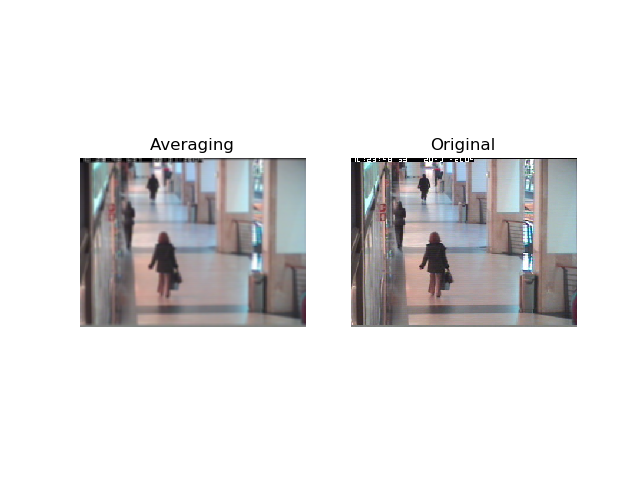

In [37]:
#filtro de media en uno
kernel = np.ones((5,5),np.float32)/25
new10 = cv2.filter2D(frames[10],-1,kernel)

new10rgb=cv2.cvtColor(new10, cv2.COLOR_BGR2RGB)
old10=cv2.cvtColor(frames[10], cv2.COLOR_BGR2RGB)

plt.figure(1)
plt.subplot(121),plt.imshow(new10rgb, vmin = 0, vmax = 255),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.subplot(122),plt.imshow(old10, vmin = 0, vmax = 255),plt.title('Original')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

<IPython.core.display.Javascript object>


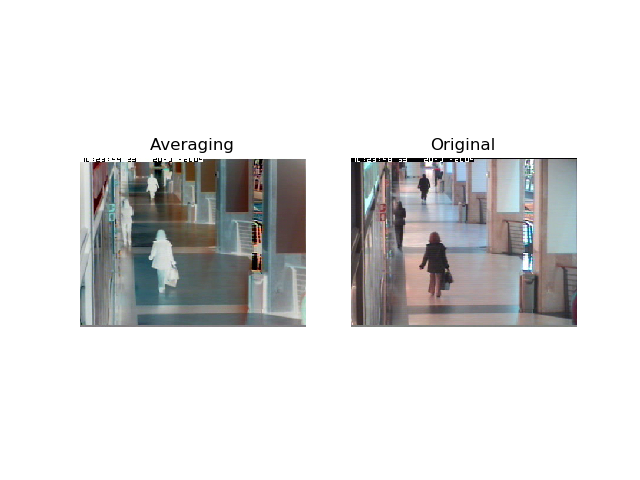

In [38]:
#negativo

new25 = 255-frames[25]

new25rgb=cv2.cvtColor(new25, cv2.COLOR_BGR2RGB)
old25=cv2.cvtColor(frames[25], cv2.COLOR_BGR2RGB)

plt.figure(2)
plt.subplot(121),plt.imshow(new25rgb, vmin = 0, vmax = 255),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.subplot(122),plt.imshow(old10, vmin = 0, vmax = 255),plt.title('Original')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

In [41]:
#sustituir en el video 

frames[10] = new10
frames[25] = new25
height, width, layers = new25.shape
size = (width,height)

out = cv2.VideoWriter('newshopping.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(frames)):
    out.write(frames[i])
out.release()

In [ ]:
#reproducir nuevo video

newvidcap = cv2.VideoCapture('newshopping.avi')
success,frame = newvidcap.read()

frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA) # because Bokeh expects a RGBA image
frame=cv2.flip(frame, -1) # because Bokeh flips vertically
width=frame.shape[1]
height=frame.shape[0]
p3 = figure(x_range=(0,width), y_range=(0,height), output_backend="webgl", width=width, height=height)
myImage3 = p3.image_rgba(image=[frame], x=0, y=0, dw=width, dh=height)
show(p3, notebook_handle=True)
cont = 0
while success:
    success,frame = newvidcap.read()
    if not success:
        newvidcap.release()
        break
    frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
    frame=cv2.flip(frame, -1)
    myImage3.data_source.data['image']=[frame]
    push_notebook()
    time.sleep(1/25)  
vidcap.release()   